<a href="https://colab.research.google.com/github/martuscellifaria/FluidsAcousticsHeat/blob/master/Lowson_RDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RDT-Modified Lowson Airfoil Turbulent Inflow Noise Prediction Method**

For more detailed info, please consult the full article at https://rdcu.be/b5uAF or e-mail me at martuscellifaria@gmail.com.

Check the Poli-Wind website at https://sites.usp.br/poli-wind

## **1 Libraries definition**
First things first, right?

In [1]:
# Import Libraries 
# ----------------------------------------------
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

# **2 Problem definition**
First step is to set up the problem variables. That is, define the desired frequency range, the airfoil geometry, the mean flow parameters and the observer position. Figures 2, 3 and 4 of https://rdcu.be/b5uAF should provide a better understanding. Let us proceed to the next step.

In [2]:
#Set the frequency range (In this case, the 1/3 Octave Band is chosen):
f_vec = np.array([10, 12.5, 16, 20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000, 12500, 16000, 20000])

#Set the airfoil geometry
c = 2 #m chord
L = 4 #m span
alpha = 0 #angle of attack

#Set the turbulent inflow parameters
u = 24 #m/s mean wind speed
I = 0.16 #turbulence intensity 0<I<1
Lambda = 40 #m turbulence integral length scale

#Observer position/directivity parameters
r_e = 1 #m distance between source and observer
phi = 90*np.pi/180
theta = 90*np.pi/180

## **3 RDT-Modified Lowson Method definition**
Now is when the fun starts. This is the implementation of the combination of equations 4 and 13 from https://rdcu.be/b5uAF as a function of the listed variables. The only difference from the article is the inclusion of the angle of attack to the turbulent inflow noise prediction. This constraint does not seem to play a large role in the results, but it should definitely be applied if this method is compiled together with other airfoil noise sources (NASA BPM, for example). Any other information about angle of attack in this kind of prediction method, check the manuscript from Buck, Oerlemans and Palo: https://doi.org/10.2514/1.J056134.

In [62]:
def LowsonRDT(f_vec, c, L, alpha, u, I, Lambda, r_e, phi, theta):
    #Important constants
    rho = 1.225 #kg/m³ air density
    c_0 = 340 #m/s speed of sound
    mu = 1.647*(10**-5) #Pa*s air viscosity

    #Pre-calculation parameters
    Re = rho*u*c/mu #flow Reynolds number
    M = u/c_0 #flow Mach number
    beta = np.sqrt(1-(M**2)) #Prandtl-Glauert compressibility factor
    D_L = (((np.sin(np.pi*theta/180))**2)*((np.sin(np.pi*phi/180))**2))/((1+(M*np.cos(np.pi*theta/180)))**4) #spherical directivity

    #Memory allocation
    j = len(f_vec)
    K = np.zeros(j)
    S = np.zeros(j)
    LFC = np.zeros(j)
    Aux1 = np.zeros(j)
    Aux = np.zeros(j)
    Aux4 = np.zeros(j)
    Aux5 = np.zeros(j)
    SPL = np.zeros(j)

    #Lowson method script
    for idx in range (0, j):
        K[idx] = np.pi*f_vec[idx]*c/u
        S[idx] = np.sqrt(((2*np.pi*K[idx]/(beta**2))+((1+(2.4*K[idx]/(beta**2)))**-1))**-1)
        LFC[idx] = (1+9*((alpha*np.pi/180)**2))*(10*(S[idx]**2)*M*(K[idx]**2))/(beta**2)
        Aux1[idx] = (10*np.log10((LFC[idx])/((1+(LFC[idx]))))) + 85.95
        Aux = (rho**2)*(c_0**2)*L*Lambda*(u**2)*(I**2)*(M**3)*(D_L)/(2*(r_e**2))
        Aux4[idx] = (((K[idx]**3)/((1+(K[idx]**2)))**(19/6)))
        Aux5[idx] = 10*np.log10(Aux*Aux4[idx])
        SPL[idx] = 10*np.log10((10**((Aux1[idx] + Aux5[idx])/10)))
    return SPL

## **4 Calling the function and plotting the results**
I guess it is self explainable at this point :D

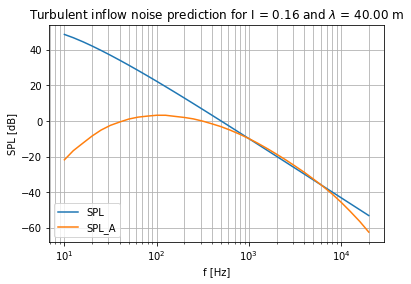

In [63]:
A_filter = np.array([-70.4, -63.4, -56.7, -50.5, -44.7, -39.4, -34.6, -30.2, -26.2, -22.5, -19.1, -16.1, -13.4, -10.9, -8.6, -6.6, -4.8, -3.2, -1.9, -0.8, 0, 0.6, 1, 1.2, 1.3, 1.2, 1, 0.5, -0.1, -1.1, -2.5, -4.3, -6.6, -9.3])
SPL = LowsonRDT(f_vec, c, L, alpha, u, I, Lambda, r_e, phi, theta)
plt.figure()
plt.semilogx(f_vec, SPL, label="SPL")
plt.semilogx(f_vec, SPL+A_filter, label="SPL_A")
plt.title("Turbulent inflow noise prediction for I = %.2f and $\lambda$ = %.2f m" % (I, Lambda))
plt.xlabel('f [Hz]')
plt.ylabel('SPL [dB]')
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='lower left')
plt.show()

## **5 Method validation**
As in https://rdcu.be/b5uAF, let us then reproduce the experimental conditions presented in the manuscripts of Bampanis *et al.* (https://doi.org/10.2514/6.2019-2741) and Juknevicius and Chong (https ://doi.org/10.1016/j.jsv.2018.02.038). This time, the data was gathered from their great articles with aid of the powerful tool Engauge Digitizer. You should definitely check this out at Markum Mitchell Github (https://markummitchell.github.io/engauge-digitizer/).

## **5.1.1 Bampanis *et. al* for u = 19 m/s**
The flow conditions are already established at https://doi.org/10.2514/6.2019-2741 and https://rdcu.be/b5uAF, so for the sake of brevity, the function will be called in terms of them with no preamble like in the past sections.

In [64]:
f_vec_b19 = np.array([102.3,102.37,102.42,114,148.6,148.76,176,182,194,208,221,244,271,273,286,289,349,359,366,385,400,402,447,478,482,485,491,497,500,556,617,622,622,678,772,793,808,891,892,893,1028,1036,1037,1194,1225,1249,1327,1337,1355,1432,1456,1477,1570,1601,1722,1726,1757,1847,1891,2012,2016,2052,2101,2277,2325,2349,2488,2546,2552,2677,2698,2733,2866,3072,3087,3112,3271,3285,3372,3438,3743,3968,4040,4085,4119,4510,4574,4781,5046,5117,5817,5904,5973,6240,6307,6560,6710,7063,7094,7478,7553,7852,7935,8004,8727,8845,9643,10168,10583,10707,11623])
SPL_b19 = np.array([35, 35,35,34,34,34,35,35,36,36,35,35,35,35,35.97,36,36,36,35,33,33.25,33,33,34,34,34,35,34.6,34,33,31,31,31,32,31,31,31,30,30,30,30,30.38,30,28,28,29,29,29,29,26.32,26,26,27,27,23.18,23,23,24,24,21,21,21,21,17,17.18,17,16,15.24,15,18,18,18,15,11,11.27,11,12,12,12,11,10,12,12,12,12,8,8,9,9,9,2,2,2,3,3,2,0.272,-2,-2,0.247,0.661,-2,-2,-2.6,-5,-6,-8,-10,-11, -11, -13.53])
SPL_pred_b19 = LowsonRDT(f_vec, 0.1, 0.3, 0, 19, 0.045, 0.009, 1, 90, 90)

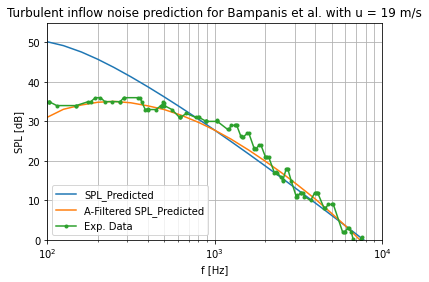

In [65]:
plt.figure()
plt.semilogx(f_vec, SPL_pred_b19, label="SPL_Predicted")
plt.semilogx(f_vec, SPL_pred_b19+A_filter, label="A-Filtered SPL_Predicted")
plt.semilogx(f_vec_b19, SPL_b19, '.-', label="Exp. Data")
plt.title("Turbulent inflow noise prediction for Bampanis et al. with u = 19 m/s")
plt.xlabel('f [Hz]')
plt.ylabel('SPL [dB]')
plt.xlim([100, 10000])
plt.ylim([0, 55])
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='lower left')
plt.show()

## **5.1.2 Bampanis *et. al* for u = 27 m/s**


Ditto.

In [66]:
f_vec_b27 = np.array([102.3,102.37,102.42,114,148.6,148.76,176,182,194,208,221,244,271,273,286,289,349,359,366,385,400,402,447,478,482,485,491,497,500,556,617,622,622,678,772,793,808,891,892,893,1028,1036,1037,1194,1225,1249,1327,1337,1355,1432,1456,1477,1570,1601,1722,1726,1757,1847,1891,2012,2016,2052,2101,2277,2325,2349,2488,2546,2552,2677,2698,2733,2866,3072,3087,3112,3271,3285,3372,3438,3743,3968,4040,4085,4119,4510,4574,4781,5046,5117,5817,5904,5973,6240,6307,6560,6710,7063,7094,7478,7553,7852,7935,8004,8727,8845,9643,10168,10583,10707,11623])
SPL_b27 = np.array([40,40,39,38,40,40,41,41.52,41.91,42,42.59,43,43.32,43,43.49,44,44,44,44,43,41,41,43,42.49,42,42,43,43,43,41,40,40,40,41,41.68,42,42,40,40,40,40,40,40,37.91,38,38,38.42,38.37,38.13,36,36,36,37.07,37.04,34,33.77,33,34,34,32,32,31,30.32,27.979,27.452,27.205,26.194,26.184,26.205,26.978,26.849,26.481,24.572,21.431,21.233,20.918,20.317,20.368,20.766,21.086,22.258,22.548,22.471,22.364,22.249,19.781,19.561,20.006,20.285,20.082,15.59,15,15,15,15,14,13,12,11.53,11,11.25,12,12,12,11,10,8,6,4,3.94,1])
SPL_pred_b27 = LowsonRDT(f_vec, 0.1, 0.3, 0, 27, 0.045, 0.009, 1, 90, 90)

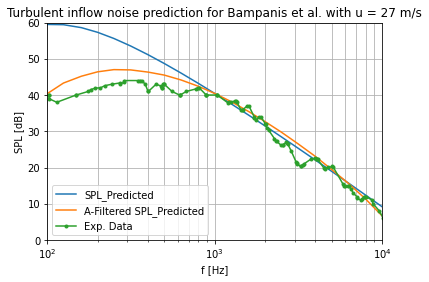

In [67]:
plt.figure()
plt.semilogx(f_vec, SPL_pred_b27, label="SPL_Predicted")
plt.semilogx(f_vec, SPL_pred_b27+A_filter, label="A-Filtered SPL_Predicted")
plt.semilogx(f_vec_b27, SPL_b27, '.-', label="Exp. Data")
plt.title("Turbulent inflow noise prediction for Bampanis et al. with u = 27 m/s")
plt.xlabel('f [Hz]')
plt.ylabel('SPL [dB]')
plt.xlim([100, 10000])
plt.ylim([0, 60])
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='lower left')
plt.show()

## **5.1.3 Bampanis *et. al* for u = 32 m/s**
Ditto.

In [68]:
f_vec_b32 = np.array([102.3,102.37,102.42,114,148.6,148.76,176,182,194,208,221,244,271,273,286,289,349,359,366,385,400,402,447,478,482,485,491,497,500,556,617,622,622,678,772,793,808,891,892,893,1028,1036,1037,1194,1225,1249,1327,1337,1355,1432,1456,1477,1570,1601,1722,1726,1757,1847,1891,2012,2016,2052,2101,2277,2325,2349,2488,2546,2552,2677,2698,2733,2866,3072,3087,3112,3271,3285,3372,3438,3743,3968,4040,4085,4119,4510,4574,4781,5046,5117,5817,5904,5973,6240,6307,6560,6710,7063,7094,7478,7553,7852,7935,8004,8727,8845,9643,10168,10583,10707,11623])
SPL_b32 = np.array([42.88,43,43,42,42,42,44,44,45,45,45,46.65,46,46,46,46,47,47,47,46,46,46,45,46,46,46,48,47,47,46,45,45,45,45,46,46,46,44,44.2,44.2,46,46,46,43,43,43,43,43,43,40,40,40,39,39,38,37.96,38,37,37,35,35,35,34,33,32,32,30,30,30.02,32,32,32,30,26,26,26,26,26,25,25,25,26,27,28,28,26,26,25,23,23,20,20,19,18,17,17,17,18,18,19,18,16,15.33,15,17,17.28,12,10,9,10,13])
SPL_pred_b32 = LowsonRDT(f_vec, 0.1, 0.3, 0, 32, 0.045, 0.009, 1, 90, 90)

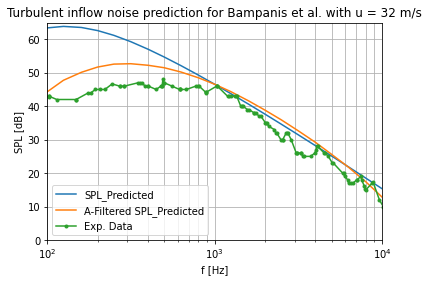

In [69]:
plt.figure()
plt.semilogx(f_vec, SPL_pred_b32, label="SPL_Predicted")
plt.semilogx(f_vec, SPL_pred_b32+A_filter, label="A-Filtered SPL_Predicted")
plt.semilogx(f_vec_b32, SPL_b32, '.-', label="Exp. Data")
plt.title("Turbulent inflow noise prediction for Bampanis et al. with u = 32 m/s")
plt.xlabel('f [Hz]')
plt.ylabel('SPL [dB]')
plt.xlim([100, 10000])
plt.ylim([0, 65])
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='lower left')
plt.show()

## **5.2.1 Juknevicius and Chong for u = 30 m/s**
The flow conditions are already established at doi.org/10.1016/j.jsv.2018.02.038 and https://rdcu.be/b5uAF, so once again for the sake of brevity, the function will be called in terms of them with no preamble like in the past sections.

In [70]:
f_vec_jc30 = np.array([100,127,166,209,253,298,382,466,552,678,851,916,1030,1109,1256,1322,1477,1637,1995,2244,2362,2598,3100,3563,3751,4037,4282,4849,5577,6090,6552,7103,7873,9457,10560,11446,12051,14585,19852])
SPL_jc30 = np.array([44.766,45.248,47.851,49.008,47.176,46.694,43.898,42.645,44.669,44.477,39.27,38.884,35.992,35.51,32.81,32.521,29.146,23.554,27.121,24.229,22.686,22.3,17.287,17.19,15.069,15.165,12.658,13.333,8.223,8.223,9.091,8.416,4.945,4.559,0.124,0.702,-1.129,-4.022,-9.229])
SPL_pred_jc30 = LowsonRDT(f_vec, 0.15, 0.498, 0, 30, 0.037, 0.0065, 1.25, 90, 90)

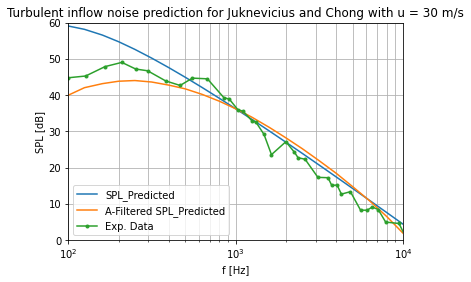

In [71]:
plt.figure()
plt.semilogx(f_vec, SPL_pred_jc30, label="SPL_Predicted")
plt.semilogx(f_vec, SPL_pred_jc30 + A_filter, label="A-Filtered SPL_Predicted")
plt.semilogx(f_vec_jc30, SPL_jc30, '.-', label="Exp. Data")
plt.title("Turbulent inflow noise prediction for Juknevicius and Chong with u = 30 m/s")
plt.xlabel('f [Hz]')
plt.ylabel('SPL [dB]')
plt.xlim([100, 10000])
plt.ylim([0, 60])
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='lower left')
plt.show()

## **5.2.2 Juknevicius and Chong for u = 50 m/s**
Ditto.

In [72]:
f_vec_jc50 = np.array([100,128,173,211,253,299,341,393,425,548,727,783,865,996,1120,1461,1573,1715,2090,2278,2484,2741,3508,4276,4661,5080,6790,7778,8532,10853,11903,15710,19861])
SPL_jc50 = np.array([54.272,56.558,56.97,55.588,56.08,59.831,59.507,55.679,55.028,58.21,55.77,55.526,52.268,53.085,53.006,48.691,44.21,45.271,39.732,41.282,39.98,37.21,36.236,28.416,27.929,29.641,22.801,20.765,19.626,15.718,16.209,13.361,9.208])
SPL_pred_jc50 = LowsonRDT(f_vec, 0.15, 0.498, 0, 50, 0.037, 0.0065, 1.25, 90, 90)

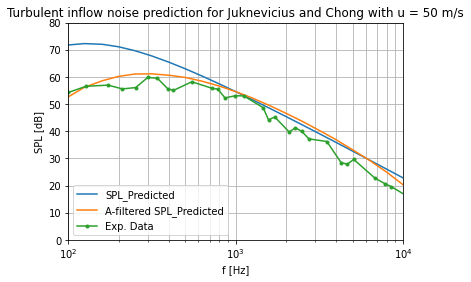

In [73]:
plt.figure()
plt.semilogx(f_vec, SPL_pred_jc50, label="SPL_Predicted")
plt.semilogx(f_vec, SPL_pred_jc50 + A_filter, label="A-filtered SPL_Predicted")
plt.semilogx(f_vec_jc50, SPL_jc50, '.-', label="Exp. Data")
plt.title("Turbulent inflow noise prediction for Juknevicius and Chong with u = 50 m/s")
plt.xlabel('f [Hz]')
plt.ylabel('SPL [dB]')
plt.xlim([100, 10000])
plt.ylim([0, 80])
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='lower left')
plt.show()

## **5.2.3 Juknevicius and Chong for u = 60 m/s**
Ditto.

In [74]:
f_vec_jc60 = np.array([100,128,168,250,349,407,457,550,721,776,867,934,995,1112,1494,1592,1696,1798,1957,2118,2281,2404,2589,2715,3165,3592,4299,4678,5064,6953,8019,8680,9699,10837,11669,12698,14878,16624,18186,20106])
SPL_jc60 = np.array([55.533,58.187,60.196,58.397,60.407,60.734,60.026,62.614,60.102,59.91,56.942,57.46,57.397,57.594,52.563,49.658,50.048,49.08,47.92,45.08,46.244,45.083,45.537,42.825,43.604,42.897,35.732,34.249,35.995,29.931,26.447,26.514,23.739,21.094,21.354,19.612,18.906,17.164,15.681,14.004])
SPL_pred_jc60 = LowsonRDT(f_vec, 0.15, 0.498, 0, 60, 0.037, 0.0065, 1.25, 90, 90)

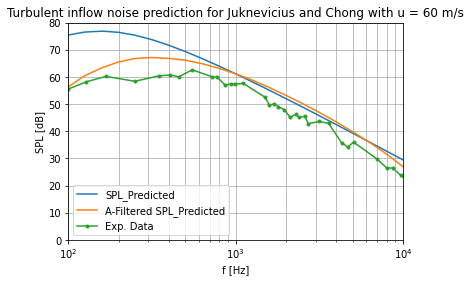

In [75]:
plt.figure()
plt.semilogx(f_vec, SPL_pred_jc60, label="SPL_Predicted")
plt.semilogx(f_vec, SPL_pred_jc60 + A_filter, label="A-Filtered SPL_Predicted")
plt.semilogx(f_vec_jc60, SPL_jc60, '.-', label="Exp. Data")
plt.title("Turbulent inflow noise prediction for Juknevicius and Chong with u = 60 m/s")
plt.xlabel('f [Hz]')
plt.ylabel('SPL [dB]')
plt.xlim([100, 10000])
plt.ylim([0, 80])
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='lower left')
plt.show()

## **6 Additional comments**
An important topic which was not covered on the manuscript https://rdcu.be/b5uAF is the gap between the prediction curve and the experimental data. However, little after the manuscript publication, the authors found out that the A-filter was not applied. After applying the A-filter, as it is seen in this notebook, the prediction curves become flawless.